Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('customer_behavior.csv')
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


Pre Processing

In [3]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [4]:
df=df.dropna()

In [5]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [6]:
df.drop(['Timestamp'], inplace=True, axis=1)

In [7]:
df1=df.copy()

In [8]:
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['15-25', '25-35', '35-45', '45-55', '55+']

df["age"] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [9]:
df.columns.to_list()

['age',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Customer_Reviews_Importance',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Personalized_Recommendation_Frequency ',
 'Recommendation_Helpfulness',
 'Rating_Accuracy ',
 'Shopping_Satisfaction',
 'Service_Appreciation',
 'Improvement_Areas']

In [10]:
le=LabelEncoder()
features=["age","Gender","Purchase_Categories","Purchase_Frequency","Personalized_Recommendation_Frequency","Recommendation_Helpfulness","Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing","Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability","Review_Helpfulness","Service_Appreciation","Improvement_Areas"]

for i in features:
  df[i]=le.fit_transform(df[i])

In [11]:
df.dtypes

age                                       int32
Gender                                    int32
Purchase_Frequency                        int32
Purchase_Categories                       int32
Personalized_Recommendation_Frequency     int32
Browsing_Frequency                        int32
Product_Search_Method                     int32
Search_Result_Exploration                 int32
Customer_Reviews_Importance               int64
Add_to_Cart_Browsing                      int32
Cart_Completion_Frequency                 int32
Cart_Abandonment_Factors                  int32
Saveforlater_Frequency                    int32
Review_Left                               int32
Review_Reliability                        int32
Review_Helpfulness                        int32
Personalized_Recommendation_Frequency     int64
Recommendation_Helpfulness                int32
Rating_Accuracy                           int64
Shopping_Satisfaction                     int64
Service_Appreciation                    

Exploratory Data Analysis

In [12]:
correlation_matrix = df.corr()

threshold = 0.5 
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")

Rating_Accuracy  and Shopping_Satisfaction are highly correlated.
Shopping_Satisfaction and Rating_Accuracy  are highly correlated.


Calculating features having low correlation

In [13]:
correlation_matrix = df.corr()

threshold = 0.0009 
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

Browsing_Frequency and Shopping_Satisfaction are low correlated.
Shopping_Satisfaction and Browsing_Frequency are low correlated.


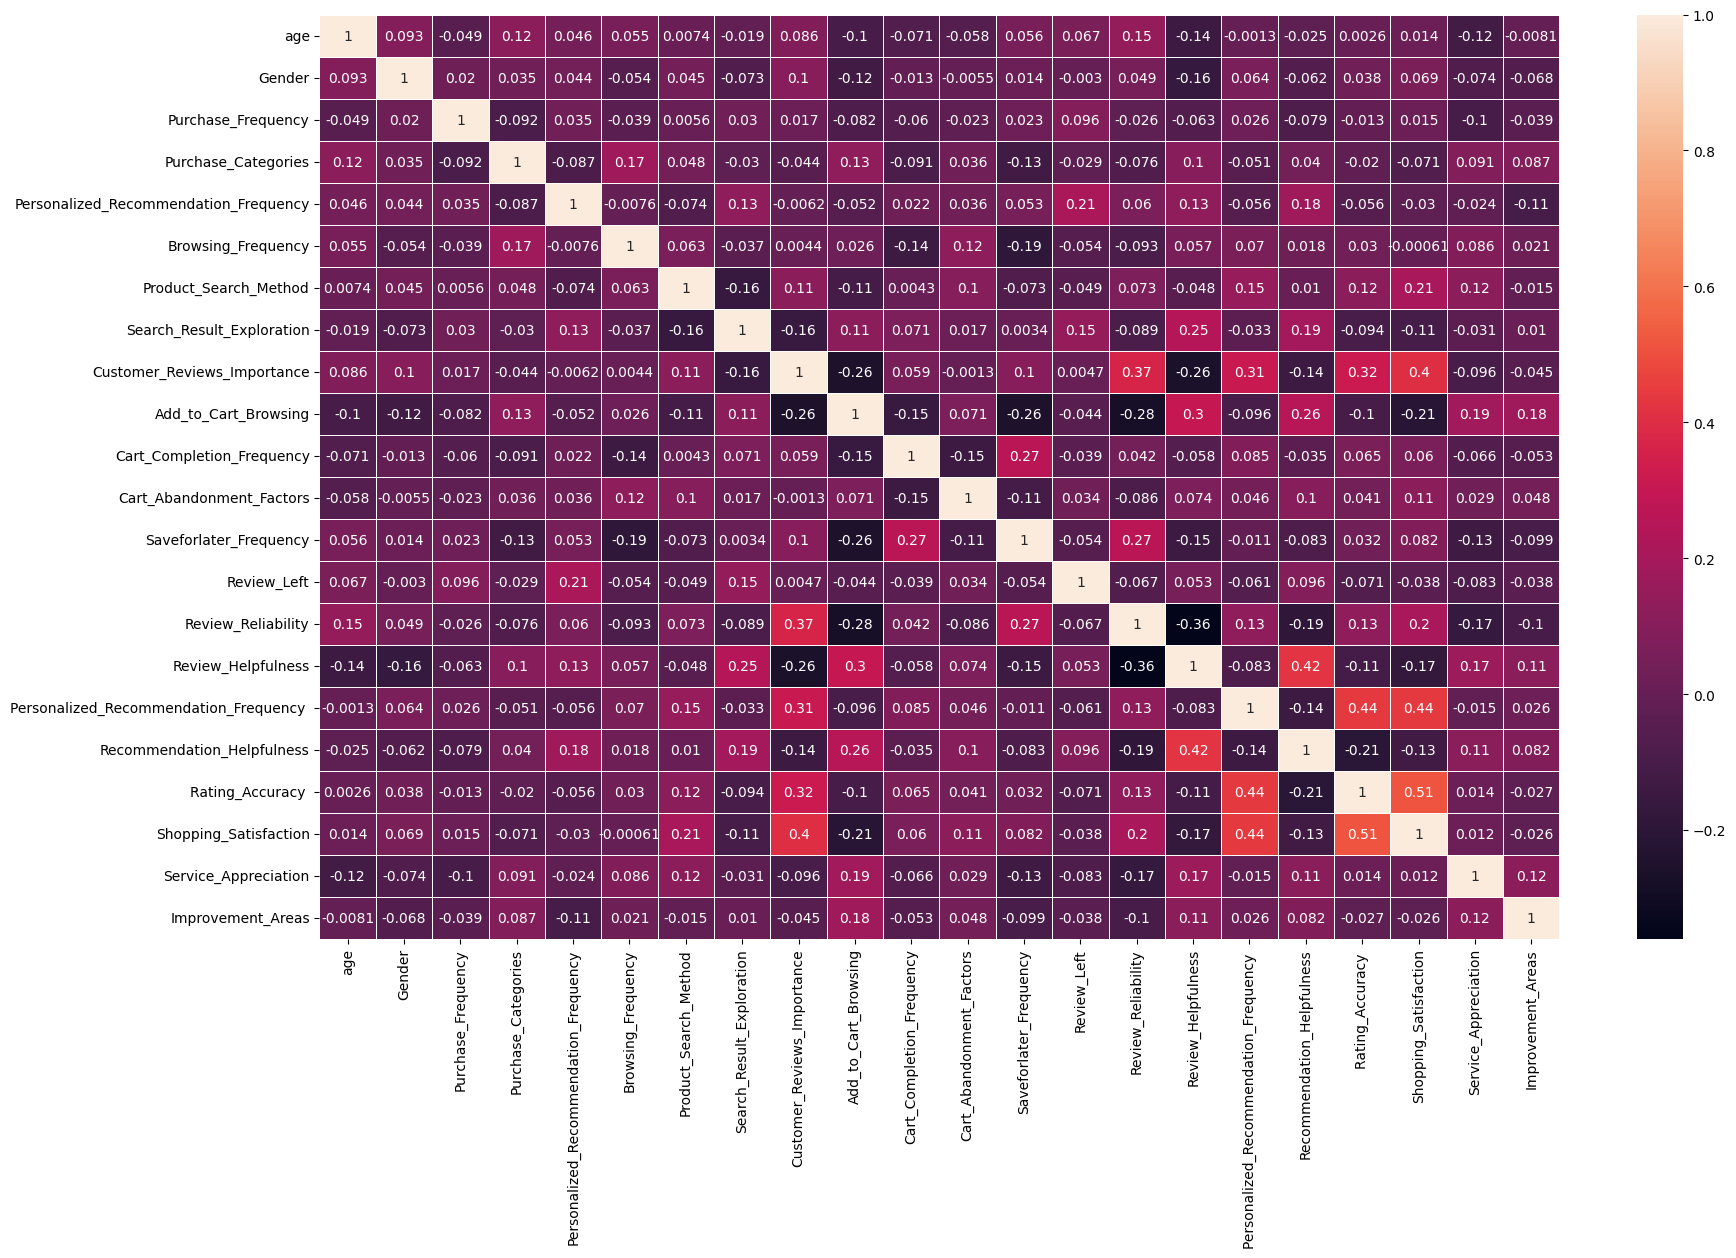

In [14]:
fig,ax=plt.subplots(1, 1, figsize=(20,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.show()

<AxesSubplot: xlabel='Review_Reliability', ylabel='count'>

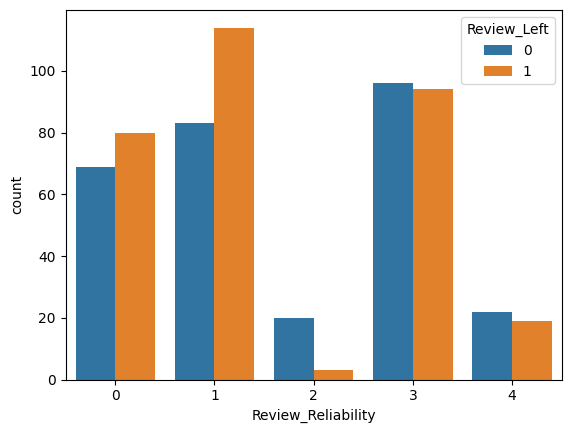

In [15]:
sns.countplot(x='Review_Reliability', data=df, hue='Review_Left')

Review Reliability range:  "Very Satisfied," "Satisfied," "Average," "Unsatisfied," and "Very Unsatisfied"

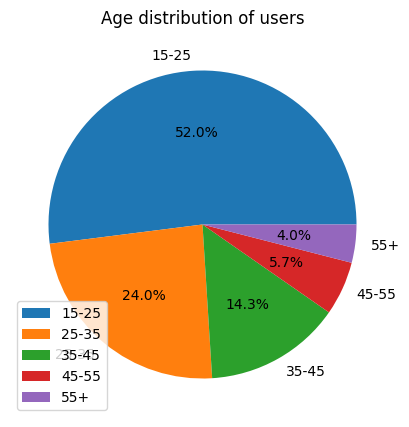

In [16]:
y=df['age'].value_counts()
plt.figure(figsize=(5,5))
labels=['15-25', '25-35', '35-45', '45-55', '55+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of users')
plt.show()

Based on the graph, it can be inferred that individuals in the age range of 15-25 have a higher level of user interaction compared to other age groups. This implies that individuals within this age range are more engagements

<AxesSubplot: xlabel='Purchase_Frequency', ylabel='count'>

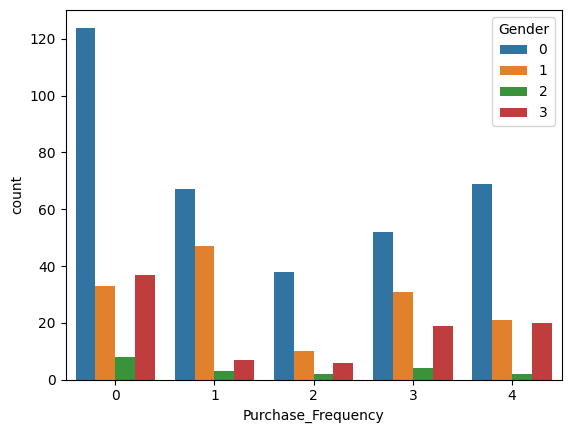

In [17]:
sns.countplot(x='Purchase_Frequency',data=df,hue='Gender')

0 - females, 1 - male, 2 - prefer not to tell their gender, 3 - other genders.

Browsing frequency range: "Multiple times a day", "Multiple times a week, "Few times a month," "Once a month," and "Less than once a month".

Based on the graph, female population is more active in the purchase than of other genders

Feature selection

In [18]:
X=df.drop(["Recommendation_Helpfulness"],axis=1)
y=df.iloc[:,-5]

In [19]:
df['Recommendation_Helpfulness'].value_counts()

1    272
0    171
2    157
Name: Recommendation_Helpfulness, dtype: int64

Selecting the best features for classification using ANOVA

In [20]:
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

feature_indices = selector.get_support(indices=True)

selected_features = X.columns[feature_indices]
selected_data = df[selected_features]
print(selected_features)

Index(['Personalized_Recommendation_Frequency', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')


In [21]:
xnew=df.drop(['age', 'Gender','Purchase_Frequency', 'Purchase_Categories', 'Browsing_Frequency','Product_Search_Method', 'Customer_Reviews_Importance','Cart_Abandonment_Factors', 'Saveforlater_Frequency','Recommendation_Helpfulness',"Service_Appreciation","Improvement_Areas"],axis=1)

In [22]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(xnew,y)

In [23]:
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[1.  , 1.  , 1.  , ..., 0.25, 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.25, 0.5 , 0.25],
       [0.  , 1.  , 1.  , ..., 0.75, 0.5 , 0.5 ],
       ...,
       [0.  , 1.  , 1.  , ..., 0.75, 0.5 , 0.75],
       [0.5 , 1.  , 0.5 , ..., 0.5 , 0.5 , 0.5 ],
       [0.5 , 1.  , 1.  , ..., 0.5 , 0.5 , 0.75]])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

Model Building

K Nearest Neighbors

In [25]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1])

In [26]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [27]:
print(clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}


In [28]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.77      0.68      0.72        25
           2       0.84      0.84      0.84        37

    accuracy                           0.79        82
   macro avg       0.78      0.79      0.78        82
weighted avg       0.79      0.79      0.79        82



SVC

In [29]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

accuracy = best_svc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best Score: 0.6948373870095983
Test Accuracy: 0.8536585365853658


In [30]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1])

In [31]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.65      0.60      0.63        25
           2       0.86      0.81      0.83        37

    accuracy                           0.74        82
   macro avg       0.73      0.74      0.73        82
weighted avg       0.75      0.74      0.74        82



Decision tree

In [32]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15]}

dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(X_train, y_train)

accuracy = best_dtc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Best Score: 0.7139222812412636
Test Accuracy: 0.7682926829268293


In [33]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2,
       2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1])

In [34]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.65      0.52      0.58        25
           2       0.81      0.92      0.86        37

    accuracy                           0.74        82
   macro avg       0.72      0.71      0.71        82
weighted avg       0.73      0.74      0.74        82



RandomForest Classifier

In [35]:
param_grid = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2]}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

accuracy = best_rfc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7343956760786506
Test Accuracy: 0.8170731707317073


In [36]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4

array([0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1])

In [37]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.77      0.68      0.72        25
           2       0.86      0.86      0.86        37

    accuracy                           0.82        82
   macro avg       0.81      0.81      0.81        82
weighted avg       0.82      0.82      0.81        82



XGBoost

In [38]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
y_pred7

array([0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1,
       0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.82      0.56      0.67        25
           2       0.85      0.89      0.87        37

    accuracy                           0.79        82
   macro avg       0.79      0.78      0.77        82
weighted avg       0.80      0.79      0.79        82



Higest accuracy is in KNN

KNN - 79

SVC - 73

Decision trees - 76

Random Forest - 78

XGBoost - 76

Clustering

In [ ]:
X=df1['Browsing_Frequency', 'Shopping_Satisfaction']
X

In [41]:
le1=LabelEncoder()
X['Browsing_Frequency']=le1.fit_transform(X['Browsing_Frequency'])

In [42]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,7):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

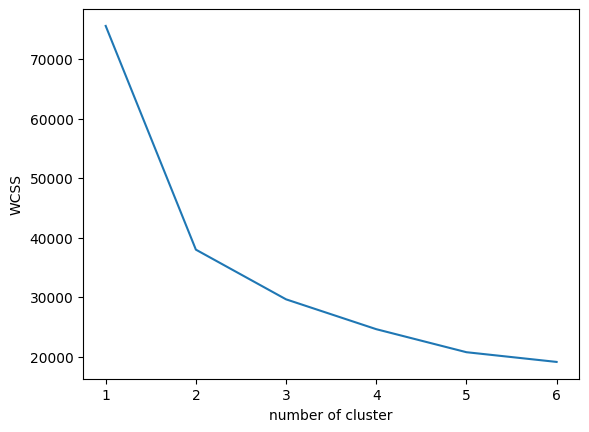

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(1,7),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [44]:
km1=KMeans(n_clusters=4,init='k-means++',random_state=5)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 3, 0,
       1, 3, 2, 3, 2, 2, 3, 3, 1, 0, 1, 3, 0, 1, 2, 3, 0, 3, 1, 1, 1, 3,
       2, 2, 2, 3, 1, 3, 0, 1, 2, 1, 3, 3, 3, 2, 3, 2, 1, 2, 1, 1, 2, 1,
       3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 2, 0, 2, 3,
       2, 1, 0, 3, 2, 1, 2, 2, 1, 3, 2, 0, 1, 3, 3, 0, 2, 2, 1, 0, 3, 1,
       1, 3, 3, 1, 2, 0, 0, 3, 2, 3, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 1, 0, 3, 2, 1, 3, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2, 2, 2,
       2, 1, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 0, 2, 3, 2, 3, 1, 2, 2,
       0, 1, 3, 3, 2, 2, 2, 2, 1, 3, 3, 2, 3, 3, 3, 0, 0, 2, 0, 0, 2, 3,
       2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 3, 0, 3, 3, 1, 1, 1, 1, 1, 2, 0, 3, 1, 2, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 0, 0, 2, 0, 2, 0, 2, 1, 3, 1, 3, 1, 1, 3, 0, 0, 2, 2, 0,
       1, 0, 3, 2, 0, 3, 1, 2, 0, 3, 0, 2, 0, 0, 1, 3, 2, 2, 0, 0, 2, 2,
       2, 3, 0, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 0,

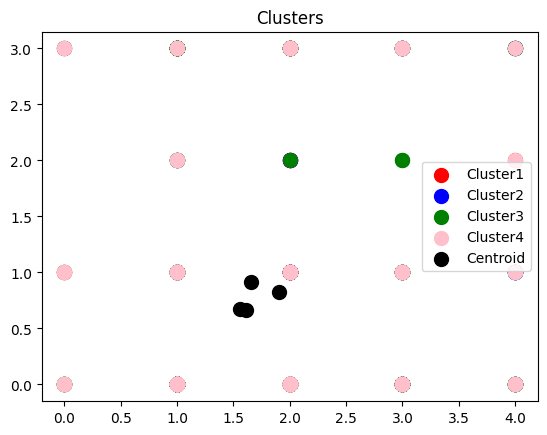

In [45]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s = 100,c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s = 100,c = 'pink', label = 'Cluster4')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.legend()
plt.show()

In [ ]:
X=pd.DataFrame(X,columns=('Browsing_Frequency','Shopping_Satisfaction'))
y=np.array(y_kmeans)
X['cluster']=y
X['Browsing_Frequency']=le1.inverse_transform(X['Browsing_Frequency'])

In [47]:
X

array([[ 1,  0,  0, ...,  1,  2, 11],
       [ 1,  0,  3, ...,  2,  8, 11],
       [ 1,  3,  0, ...,  3,  2,  9],
       ...,
       [ 1,  0,  3, ...,  3,  8,  9],
       [ 1,  0,  0, ...,  2,  8,  9],
       [ 1,  0,  4, ...,  3,  5,  9]], dtype=int64)

In [ ]:
a=X.loc[X['cluster']==0][['Browsing_Frequency','Shopping_Satisfaction','cluster']]
a

,Browsing_Frequency,Shopping_Satisfaction,cluster
2,Few times a month,3,0
3,Few times a month,4,0
22,Few times a week,3,0
25,Few times a week,3,0
27,Few times a month,5,0
...,...,...,...
592,Few times a week,4,0
593,Few times a week,4,0
595,Few times a week,4,0
596,Few times a week,3,0


In [ ]:
a['Browsing_Frequency'].value_counts()

Few times a week     120
Few times a month    106
Name: Browsing_Frequency, dtype: int64

In [ ]:
a['Shopping_Satisfaction'].value_counts()

3    169
4     51
5      6
Name: Shopping_Satisfaction, dtype: int64

In [ ]:
b=X.loc[X['cluster']==1][['Browsing_Frequency','Shopping_Satisfaction','cluster']]
b

,Browsing_Frequency,Shopping_Satisfaction,cluster
5,Rarely,2,1
33,Multiple times a day,1,1
35,Multiple times a day,1,1
36,Multiple times a day,1,1
37,Rarely,2,1
...,...,...,...
545,Rarely,1,1
547,Multiple times a day,2,1
550,Rarely,1,1
553,Multiple times a day,1,1


In [ ]:
b['Browsing_Frequency'].value_counts()

Multiple times a day    48
Rarely                  39
Name: Browsing_Frequency, dtype: int64

In [ ]:
b['Shopping_Satisfaction'].value_counts()

2    47
1    40
Name: Shopping_Satisfaction, dtype: int64

In [ ]:
c=X.loc[X['cluster']==2][['Browsing_Frequency','Shopping_Satisfaction','cluster']]
c

,Browsing_Frequency,Shopping_Satisfaction,cluster
0,Few times a week,1,2
1,Few times a month,2,2
4,Few times a month,2,2
8,Few times a month,2,2
10,Few times a month,2,2
...,...,...,...
558,Few times a week,2,2
560,Few times a week,2,2
578,Few times a week,2,2
584,Few times a week,2,2


In [ ]:
c['Browsing_Frequency'].value_counts()

Few times a week     128
Few times a month     93
Name: Browsing_Frequency, dtype: int64

In [ ]:
c['Shopping_Satisfaction'].value_counts()

2    146
1     75
Name: Shopping_Satisfaction, dtype: int64

In [ ]:
d=X.loc[X['cluster']==3][['Browsing_Frequency','Shopping_Satisfaction','cluster']]
d

,Browsing_Frequency,Shopping_Satisfaction,cluster
6,Rarely,3,3
7,Rarely,3,3
9,Rarely,4,3
15,Rarely,3,3
32,Rarely,3,3
...,...,...,...
567,Multiple times a day,3,3
569,Multiple times a day,4,3
577,Multiple times a day,4,3
594,Multiple times a day,3,3


In [ ]:
d['Browsing_Frequency'].value_counts()

Rarely                  38
Multiple times a day    28
Name: Browsing_Frequency, dtype: int64

In [ ]:
d['Shopping_Satisfaction'].value_counts()

3    39
4    16
5    11
Name: Shopping_Satisfaction, dtype: int64

Shopping satisfaction range of 1 to 5, representing "Very Satisfied," "Satisfied," "Average," "Unsatisfied," and "Very Unsatisfied," respectively. The browsing frequency is categorized as"Multiple times a day", "Multiple times a week, "Few times a month," "Once a month," and "Less than once a month."



Summary: 

Cluster 1: Users who browse "Few times a week" (120) show an average satisfaction level (169).

Cluster 2: Users who browse "Multiple times a day " (48) exhibit high satisfaction (47).

Cluster 3: Users who browse "Few times a week" (128) indicate satisfaction (146).

Cluster 4: Users who browse "Few times a week" (38) display average satisfaction (39).

In general, we can conclude that people who browse multiple times a week tend to have higher to average levels of satisfaction.